In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

In [3]:
all_ages = pd.read_csv("../data/cleaned/all_ages_cleaned.csv")
recent = pd.read_csv("../data/cleaned/recent_grads_cleaned.csv")
grad = pd.read_csv("../data/cleaned/grad_students_cleaned.csv")
women_stem = pd.read_csv("../data/cleaned/women_stem_cleaned.csv")

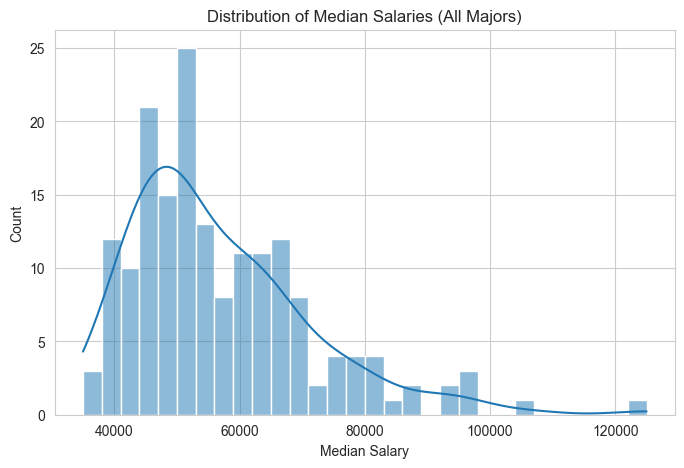

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(all_ages["Median"], bins=30, kde=True)
plt.title("Distribution of Median Salaries (All Majors)")
plt.xlabel("Median Salary")
plt.ylabel("Count")
plt.show()

- `Median salaries are right-skewed, indicating a small number of high-paying majors.`

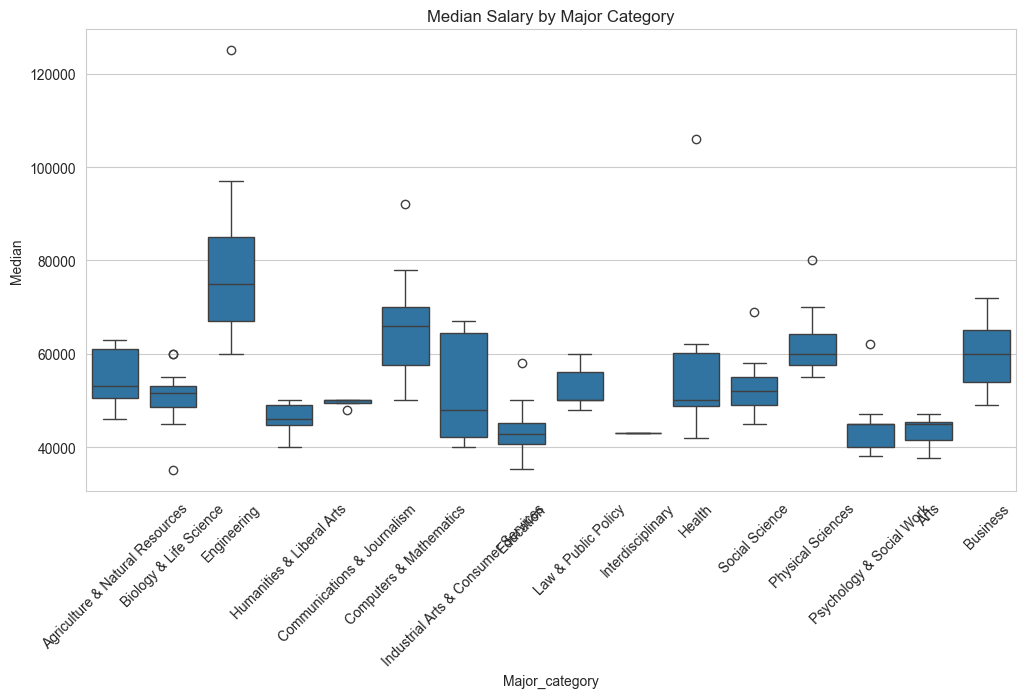

In [5]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=all_ages,
    x="Major_category",
    y="Median"
)
plt.xticks(rotation=45)
plt.title("Median Salary by Major Category")
plt.show()

- `Engineering & Computers dominate top salaries`
- `Education & Arts show lower medians`

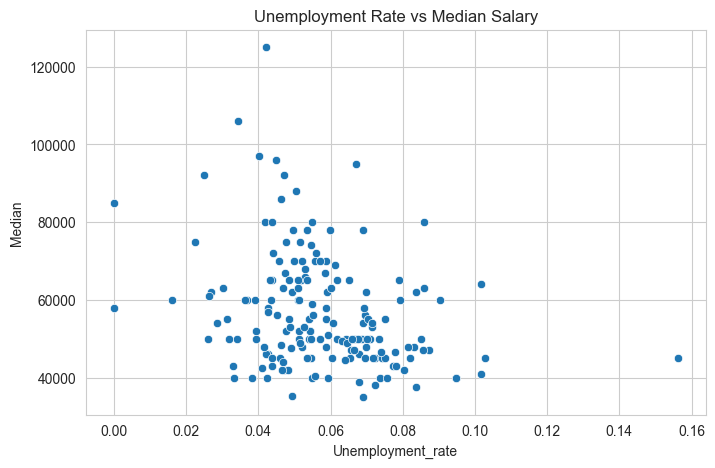

In [6]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=all_ages,
    x="Unemployment_rate",
    y="Median"
)
plt.title("Unemployment Rate vs Median Salary")
plt.show()

- `Higher salaries do not always imply lower unemployment, suggesting risk-reward tradeoffs across majors.`

In [7]:
top_paid = all_ages.sort_values("Median", ascending=False).head(10)
low_paid = all_ages.sort_values("Median").head(10)

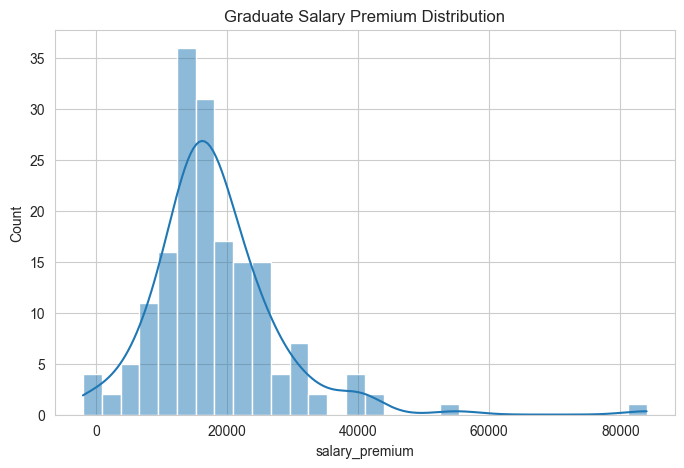

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(grad["salary_premium"], bins=30, kde=True)
plt.title("Graduate Salary Premium Distribution")
plt.show()

- `Graduate degrees provide positive salary premiums in most majors, but gains vary widely.`

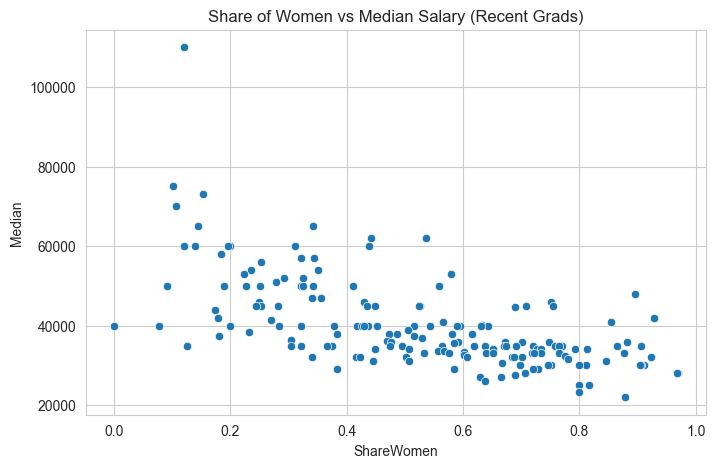

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=recent,
    x="ShareWomen",
    y="Median"
)
plt.title("Share of Women vs Median Salary (Recent Grads)")
plt.show()

- `Majors with higher female representation tend to cluster in lower salary ranges, reflecting occupational segregation.`

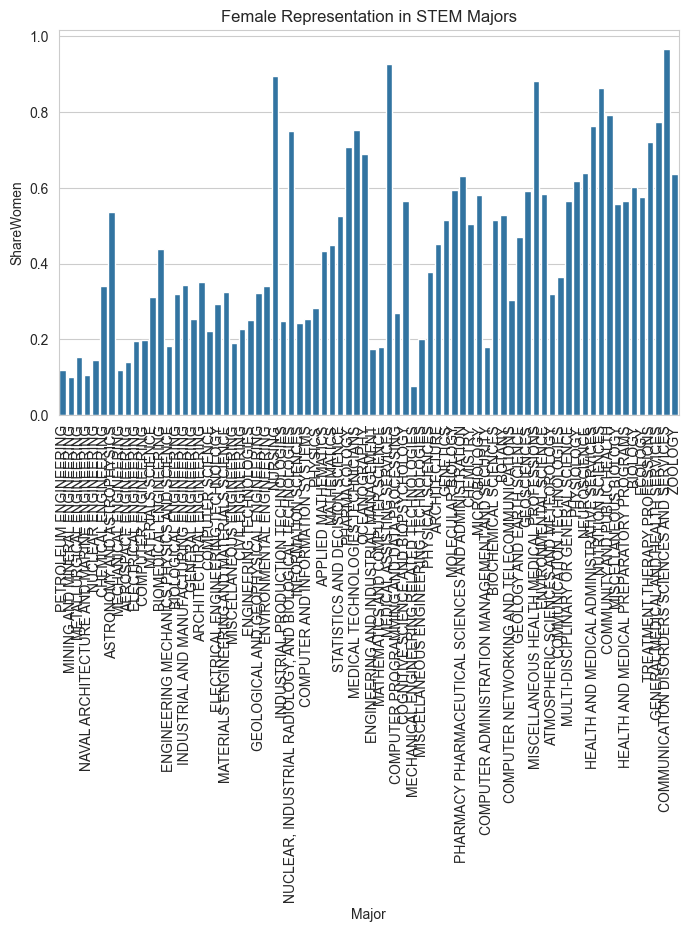

In [10]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=women_stem,
    x="Major",
    y="ShareWomen"
)
plt.xticks(rotation=90)
plt.title("Female Representation in STEM Majors")
plt.show()

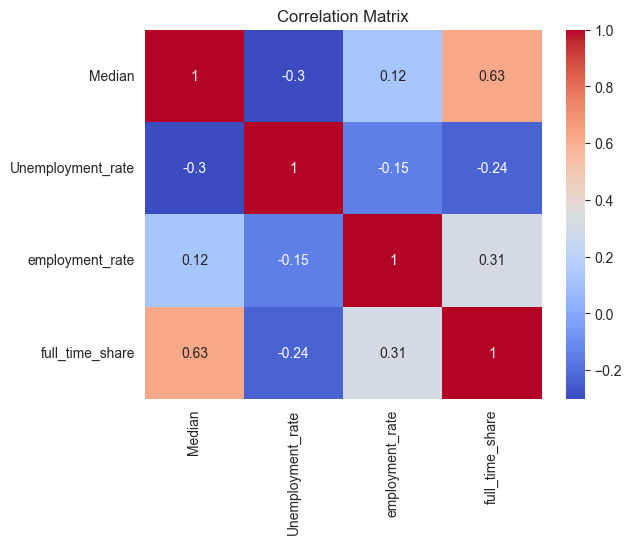

In [11]:
corr_cols = [
    "Median",
    "Unemployment_rate",
    "employment_rate",
    "full_time_share"
]

sns.heatmap(all_ages[corr_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

- `Salary shows weak correlation with unemployment but moderate correlation with full-time employment share.`

In [12]:
for name, df in {
    "All Ages": all_ages,
    "Recent Grads": recent,
    "Graduate Students": grad,
    "Women in STEM": women_stem
}.items():
    print(f"\n{name}")
    display(df.head(3))
    print("Shape:", df.shape)


All Ages


,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,employment_rate,full_time_share,salary_spread
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000,0.704225,0.820854,46000
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000,0.806338,0.835751,44000
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000,0.775173,0.866608,58000


Shape: (173, 14)

Recent Grads


,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0


Shape: (173, 21)

Graduate Students


,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium,salary_premium
0,5601,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,200,7098,6511,681,0.087543,75000,...,73607,62435,3928,0.050661,65000,47000,98000.0,0.096320,0.153846,10000
1,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,882,40492,29553,2482,0.057756,60000,...,347166,250596,25484,0.068386,48000,34000,71000.0,0.104420,0.250000,12000
2,6211,HOSPITALITY MANAGEMENT,Business,24417,437,18368,14784,1465,0.073867,65000,...,145597,113579,7409,0.048423,50000,35000,75000.0,0.119837,0.300000,15000


Shape: (173, 23)

Women in STEM


,Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,75000
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,73000


Shape: (76, 9)
